# Exploratory Data Analysis (EDA) and Preprocessing

* Basis EDA
* Handling Null/Missing Values
* Handling Outliers
* Handling Skewness
* Handling Categorical Features
* Data Normalization and Scaling
* Feature Engineering

## Importing Libraries

In [1]:
# Importing required libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, warnings as w
w.filterwarnings('ignore')

## Loading Dataset

In [2]:
# Loading car.csv file and creating dataframe
df = pd.read_csv('cars.csv')

## Basic EDA

It involves info, describe, descriptive statistics of columns.

In [3]:
# First 5 rows of dataset
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [4]:
# Shape of dataframe
df.shape

(205, 15)

In [5]:
# Data types of all columns
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower            object
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [6]:
# Name of all columns in dataframe
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'body-style',
       'drive-wheels', 'engine-location', 'width', 'height', 'engine-type',
       'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [7]:
# Detailed information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   width              205 non-null    float64
 8   height             205 non-null    float64
 9   engine-type        205 non-null    object 
 10  engine-size        205 non-null    int64  
 11  horsepower         205 non-null    object 
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              205 non-null    int64  
dtypes: float64(2), int64(5), object(8)
memory usage: 24.2+ KB


In [8]:
# Descriptive statistics of numerical columns
df.describe()

,symboling,width,height,engine-size,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,65.907805,53.724878,126.907317,25.219512,30.751220,13227.478049
std,1.245307,2.145204,2.443522,41.642693,6.542142,6.886443,7902.651615
min,-2.000000,60.300000,47.800000,61.000000,13.000000,16.000000,5118.000000
25%,0.000000,64.100000,52.000000,97.000000,19.000000,25.000000,7788.000000
50%,1.000000,65.500000,54.100000,120.000000,24.000000,30.000000,10345.000000
75%,2.000000,66.900000,55.500000,141.000000,30.000000,34.000000,16500.000000
max,3.000000,72.300000,59.800000,326.000000,49.000000,54.000000,45400.000000


In [9]:
# Descriptive statistics of categorical columns
df.describe(include=['object'])

,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,horsepower
count,205,205,205,205,205,205,205,205
unique,52,22,2,5,3,2,7,60
top,?,toyota,gas,sedan,fwd,front,ohc,68
freq,41,32,185,96,120,202,148,19


In [10]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205.000000,205.000000,205,205.000000,205,205.000000,205.000000,205.000000
unique,NaN,52,22,2,5,3,2,NaN,NaN,7,NaN,60,NaN,NaN,NaN
top,NaN,?,toyota,gas,sedan,fwd,front,NaN,NaN,ohc,NaN,68,NaN,NaN,NaN
freq,NaN,41,32,185,96,120,202,NaN,NaN,148,NaN,19,NaN,NaN,NaN
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,65.907805,53.724878,NaN,126.907317,NaN,25.219512,30.751220,13227.478049
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,2.145204,2.443522,NaN,41.642693,NaN,6.542142,6.886443,7902.651615
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,60.300000,47.800000,NaN,61.000000,NaN,13.000000,16.000000,5118.000000
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,64.100000,52.000000,NaN,97.000000,NaN,19.000000,25.000000,7788.000000
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,65.500000,54.100000,NaN,120.000000,NaN,24.000000,30.000000,10345.000000
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,66.900000,55.500000,NaN,141.000000,NaN,30.000000,34.000000,16500.000000


<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>normalized-losses</th>
      <th>make</th>
      <th>fuel-type</th>
      <th>body-style</th>
      <th>drive-wheels</th>
      <th>engine-location</th>
      <th>engine-type</th>
      <th>horsepower</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>count</th>
      <td>205</td>
      <td>205</td>
      <td>205</td>
      <td>205</td>
      <td>205</td>
      <td>205</td>
      <td>205</td>
      <td>205</td>
    </tr>
    <tr>
      <th>unique</th>
      <td>52</td>
      <td>22</td>
      <td>2</td>
      <td>5</td>
      <td>3</td>
      <td>2</td>
      <td>7</td>
      <td>60</td>
    </tr>
    <tr>
      <th>top</th>
      <td>?</td>
      <td>toyota</td>
      <td>gas</td>
      <td>sedan</td>
      <td>fwd</td>
      <td>front</td>
      <td>ohc</td>
      <td>68</td>
    </tr>
    <tr>
      <th>freq</th>
      <td>41</td>
      <td>32</td>
      <td>185</td>
      <td>96</td>
      <td>120</td>
      <td>202</td>
      <td>148</td>
      <td>19</td>
    </tr>
  </tbody>
</table>
</div>

Looks like something wrong,

* normalized-losses and horsepower columns should be numerical but it's showing as categorical
* Also in normalized-losses column top value is ?, what is this?

In [11]:
df['normalized-losses'].unique()

array(['?', '164', '158', '192', '188', '121', '98', '81', '118', '148',
       '110', '145', '137', '101', '78', '106', '85', '107', '104', '113',
       '150', '129', '115', '93', '142', '161', '153', '125', '128',
       '122', '103', '168', '108', '194', '231', '119', '154', '74',
       '186', '83', '102', '89', '87', '77', '91', '134', '65', '197',
       '90', '94', '256', '95'], dtype=object)

In [12]:
df['normalized-losses'].value_counts()

normalized-losses
?      41
161    11
91      8
150     7
134     6
128     6
104     6
85      5
94      5
65      5
102     5
74      5
168     5
103     5
95      5
106     4
93      4
118     4
148     4
122     4
83      3
125     3
154     3
115     3
137     3
101     3
119     2
87      2
89      2
192     2
197     2
158     2
81      2
188     2
194     2
153     2
129     2
108     2
110     2
164     2
145     2
113     2
256     1
107     1
90      1
231     1
142     1
121     1
78      1
98      1
186     1
77      1
Name: count, dtype: int64

In [13]:
df['horsepower'].unique()

array(['111', '154', '102', '115', '110', '140', '160', '101', '121',
       '182', '48', '70', '68', '88', '145', '58', '76', '60', '86',
       '100', '78', '90', '176', '262', '135', '84', '64', '120', '72',
       '123', '155', '184', '175', '116', '69', '55', '97', '152', '200',
       '95', '142', '143', '207', '288', '?', '73', '82', '94', '62',
       '56', '112', '92', '161', '156', '52', '85', '114', '162', '134',
       '106'], dtype=object)

In [14]:
df['horsepower'].value_counts()

horsepower
68     19
70     11
69     10
116     9
110     8
95      7
88      6
62      6
101     6
160     6
114     6
84      5
97      5
102     5
145     5
82      5
76      5
111     4
92      4
123     4
86      4
90      3
73      3
85      3
207     3
182     3
121     3
152     3
112     2
56      2
161     2
156     2
94      2
52      2
?       2
162     2
155     2
184     2
100     2
176     2
55      1
262     1
134     1
115     1
140     1
48      1
58      1
60      1
78      1
135     1
200     1
64      1
120     1
72      1
154     1
288     1
143     1
142     1
175     1
106     1
Name: count, dtype: int64

### Let's clean the data

In [15]:
df['normalized-losses'].replace('?', np.nan, inplace=True)

In [16]:
df['horsepower'].replace('?', np.nan, inplace=True)

Now convert the datatypes of these columns to float datatype

In [17]:
df['normalized-losses'] = df['normalized-losses'].astype('float64')
df['horsepower'] = df['horsepower'].astype('float64')

In [18]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
body-style            object
drive-wheels          object
engine-location       object
width                float64
height               float64
engine-type           object
engine-size            int64
horsepower           float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [19]:
df['normalized-losses'].unique()

array([ nan, 164., 158., 192., 188., 121.,  98.,  81., 118., 148., 110.,
       145., 137., 101.,  78., 106.,  85., 107., 104., 113., 150., 129.,
       115.,  93., 142., 161., 153., 125., 128., 122., 103., 168., 108.,
       194., 231., 119., 154.,  74., 186.,  83., 102.,  89.,  87.,  77.,
        91., 134.,  65., 197.,  90.,  94., 256.,  95.])

In [20]:
df['horsepower'].unique()

array([111., 154., 102., 115., 110., 140., 160., 101., 121., 182.,  48.,
        70.,  68.,  88., 145.,  58.,  76.,  60.,  86., 100.,  78.,  90.,
       176., 262., 135.,  84.,  64., 120.,  72., 123., 155., 184., 175.,
       116.,  69.,  55.,  97., 152., 200.,  95., 142., 143., 207., 288.,
        nan,  73.,  82.,  94.,  62.,  56., 112.,  92., 161., 156.,  52.,
        85., 114., 162., 134., 106.])

We can also filter out data on the basis of our requirement

In [21]:
gas_df = df[df['fuel-type']=='gas']
gas_df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,NaN,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,NaN,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115.0,18,22,17450


In [22]:
diesel_df = df[df['fuel-type']=='diesel']
diesel_df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
63,0,NaN,mazda,diesel,sedan,fwd,front,66.5,55.5,ohc,122,64.0,36,42,10795
66,0,NaN,mazda,diesel,sedan,rwd,front,66.1,54.4,ohc,134,72.0,31,39,18344
67,-1,93.0,mercedes-benz,diesel,sedan,rwd,front,70.3,56.5,ohc,183,123.0,22,25,25552
68,-1,93.0,mercedes-benz,diesel,wagon,rwd,front,70.3,58.7,ohc,183,123.0,22,25,28248
69,0,93.0,mercedes-benz,diesel,hardtop,rwd,front,70.3,54.9,ohc,183,123.0,22,25,28176


## Handling Null Values

To handle null/missing values we can do 2 things:

* Drop those null/missing values
* Impute/fill those null values

In [23]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
body-style            0
drive-wheels          0
engine-location       0
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

### Let's add some null values to dataset

In [24]:
df.loc[50:100,'fuel-type'] = np.nan

In [25]:
df['fuel-type']

0         gas
1         gas
2         gas
3         gas
4         gas
        ...  
200       gas
201       gas
202       gas
203    diesel
204       gas
Name: fuel-type, Length: 205, dtype: object

In [26]:
df.loc[0:70,'engine-location'] = np.nan

In [27]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type            51
body-style            0
drive-wheels          0
engine-location      71
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

### Dropping Null Values

In [28]:
df_rows_dropped = df.dropna(axis=0)
df_rows_dropped.shape

(88, 15)

In [29]:
df_rows_dropped.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [30]:
df_columns_dropped = df.dropna(axis=1)
df_columns_dropped.shape

(205, 11)

In [31]:
df_columns_dropped.isnull().sum()

symboling       0
make            0
body-style      0
drive-wheels    0
width           0
height          0
engine-type     0
engine-size     0
city-mpg        0
highway-mpg     0
price           0
dtype: int64

### Dropping any particular row with null values

In [32]:
df.drop(50)

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,convertible,rwd,NaN,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,NaN,alfa-romero,gas,convertible,rwd,NaN,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,NaN,alfa-romero,gas,hatchback,rwd,NaN,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,NaN,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,NaN,66.4,54.3,ohc,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470


In [33]:
df.drop([50,67,20])

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,convertible,rwd,NaN,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,NaN,alfa-romero,gas,convertible,rwd,NaN,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,NaN,alfa-romero,gas,hatchback,rwd,NaN,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,gas,sedan,fwd,NaN,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,gas,sedan,4wd,NaN,66.4,54.3,ohc,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
201,-1,95.0,volvo,gas,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
202,-1,95.0,volvo,gas,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
203,-1,95.0,volvo,diesel,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470


### Dropping any particular column

In [34]:
df.drop('fuel-type', axis=1) # axis=1 is mandatory otherwise this will throw error

,symboling,normalized-losses,make,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,convertible,rwd,NaN,64.1,48.8,dohc,130,111.0,21,27,13495
1,3,NaN,alfa-romero,convertible,rwd,NaN,64.1,48.8,dohc,130,111.0,21,27,16500
2,1,NaN,alfa-romero,hatchback,rwd,NaN,65.5,52.4,ohcv,152,154.0,19,26,16500
3,2,164.0,audi,sedan,fwd,NaN,66.2,54.3,ohc,109,102.0,24,30,13950
4,2,164.0,audi,sedan,4wd,NaN,66.4,54.3,ohc,136,115.0,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,sedan,rwd,front,68.9,55.5,ohc,141,114.0,23,28,16845
201,-1,95.0,volvo,sedan,rwd,front,68.8,55.5,ohc,141,160.0,19,25,19045
202,-1,95.0,volvo,sedan,rwd,front,68.9,55.5,ohcv,173,134.0,18,23,21485
203,-1,95.0,volvo,sedan,rwd,front,68.9,55.5,ohc,145,106.0,26,27,22470


In [35]:
df.drop(['fuel-type','horsepower'], axis=1)

,symboling,normalized-losses,make,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,convertible,rwd,NaN,64.1,48.8,dohc,130,21,27,13495
1,3,NaN,alfa-romero,convertible,rwd,NaN,64.1,48.8,dohc,130,21,27,16500
2,1,NaN,alfa-romero,hatchback,rwd,NaN,65.5,52.4,ohcv,152,19,26,16500
3,2,164.0,audi,sedan,fwd,NaN,66.2,54.3,ohc,109,24,30,13950
4,2,164.0,audi,sedan,4wd,NaN,66.4,54.3,ohc,136,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,sedan,rwd,front,68.9,55.5,ohc,141,23,28,16845
201,-1,95.0,volvo,sedan,rwd,front,68.8,55.5,ohc,141,19,25,19045
202,-1,95.0,volvo,sedan,rwd,front,68.9,55.5,ohcv,173,18,23,21485
203,-1,95.0,volvo,sedan,rwd,front,68.9,55.5,ohc,145,26,27,22470


### Filling Null values

* Fill null values of numerical column with either mean or median value
* Fill null values of categorical column with mode value

In [36]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type            51
body-style            0
drive-wheels          0
engine-location      71
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [37]:
df['normalized-losses'].fillna(0)

0        0.0
1        0.0
2        0.0
3      164.0
4      164.0
       ...  
200     95.0
201     95.0
202     95.0
203     95.0
204     95.0
Name: normalized-losses, Length: 205, dtype: float64

In [38]:
filled_null_df = df.fillna(0)

In [39]:
filled_null_df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [40]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type            51
body-style            0
drive-wheels          0
engine-location      71
width                 0
height                0
engine-type           0
engine-size           0
horsepower            2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [41]:
avg_normalized = df['normalized-losses'].mean()
avg_normalized

122.0

In [42]:
avg_horsepower = df['horsepower'].mean()
avg_horsepower

104.25615763546799

In [43]:
df['normalized-losses'].fillna(avg_normalized, inplace=True)
df['horsepower'].fillna(avg_horsepower, inplace=True)

In [44]:
df.isnull().sum()

symboling             0
normalized-losses     0
make                  0
fuel-type            51
body-style            0
drive-wheels          0
engine-location      71
width                 0
height                0
engine-type           0
engine-size           0
horsepower            0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [45]:
fuel_mode = df['fuel-type'].mode()
fuel_mode[0]

'gas'

In [46]:
engine_mode = df['engine-location'].mode()
engine_mode[0]

'front'

In [47]:
df['fuel-type'].fillna(fuel_mode[0], inplace=True)

In [48]:
df['engine-location'].fillna(engine_mode[0], inplace=True)

In [49]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
body-style           0
drive-wheels         0
engine-location      0
width                0
height               0
engine-type          0
engine-size          0
horsepower           0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

[link text](https:// [link text](https://))# Handling Outliers

<Axes: ylabel='price'>

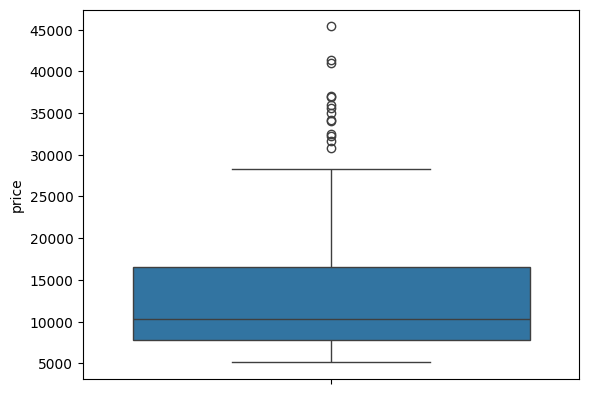

In [50]:
sns.boxplot(df['price'])

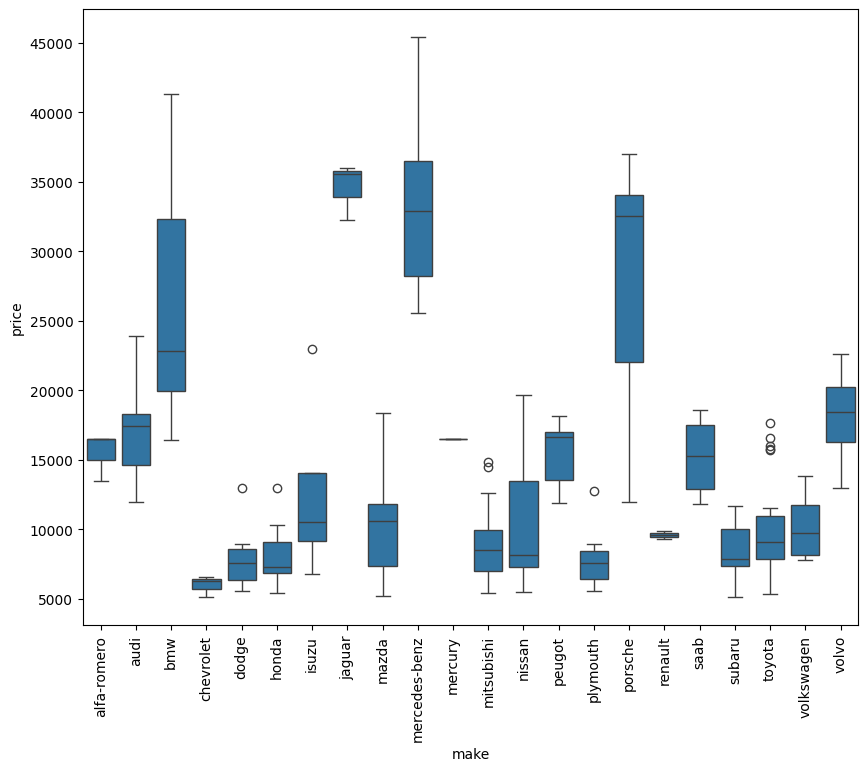

In [51]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='make',y='price')
plt.xticks(rotation=90)
plt.show()

Now we have three options:

* Those values can be dropped
* Those values can be capped
* Those values can be replaced by median/mean

### Dropping outliers

In [52]:
df_copy = df.copy()

In [53]:
df_copy.shape

(205, 15)

In [54]:
def dropping_outliers(dataframe, value):

    q1 = dataframe[dataframe['make']==value]['price'].quantile(0.25)
    q3 = dataframe[dataframe['make']==value]['price'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    dataframe.drop(dataframe[(dataframe['make']==value) & (dataframe['price']>= upper)].index, inplace=True)
    dataframe.drop(dataframe[(dataframe['make']==value) & (dataframe['price']<= lower)].index, inplace=True)

    return dataframe

In [55]:
df_copy = dropping_outliers(df_copy, 'dodge')
df_copy.shape

(204, 15)

In [56]:
df_copy = dropping_outliers(df_copy, 'honda')
df_copy.shape

(203, 15)

In [57]:
df_copy = dropping_outliers(df_copy, 'isuzu')
df_copy.shape

(202, 15)

In [58]:
df_copy = dropping_outliers(df_copy, 'mitsubishi')
df_copy.shape

(200, 15)

In [59]:
df_copy = dropping_outliers(df_copy, 'plymouth')
df_copy.shape

(199, 15)

In [60]:
df_copy = dropping_outliers(df_copy, 'toyota')
df_copy.shape

(194, 15)

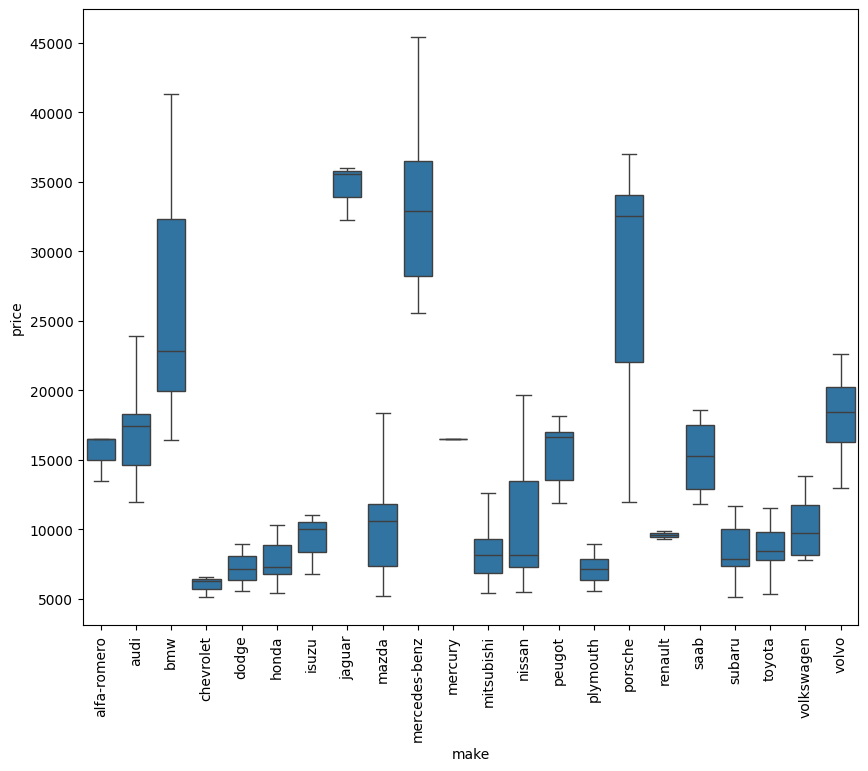

In [61]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_copy, x='make',y='price')
plt.xticks(rotation=90)
plt.show()

### Capping

In [62]:
df_copy = df.copy()

In [63]:
def capping_outliers(dataframe, value):

    q1 = dataframe[dataframe['make']==value]['price'].quantile(0.25)
    q3 = dataframe[dataframe['make']==value]['price'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    dataframe.loc[dataframe[(dataframe['make']==value) & (dataframe['price']>= upper)].index,'price'] = upper
    dataframe.loc[dataframe[(dataframe['make']==value) & (dataframe['price']<= lower)].index,'price'] = lower

    return dataframe

In [64]:
for i in ['dodge','honda','isuzu','mitsubishi','plymouth','toyota']:
    df_copy = capping_outliers(df_copy,i)

print(df_copy.shape)

(205, 15)


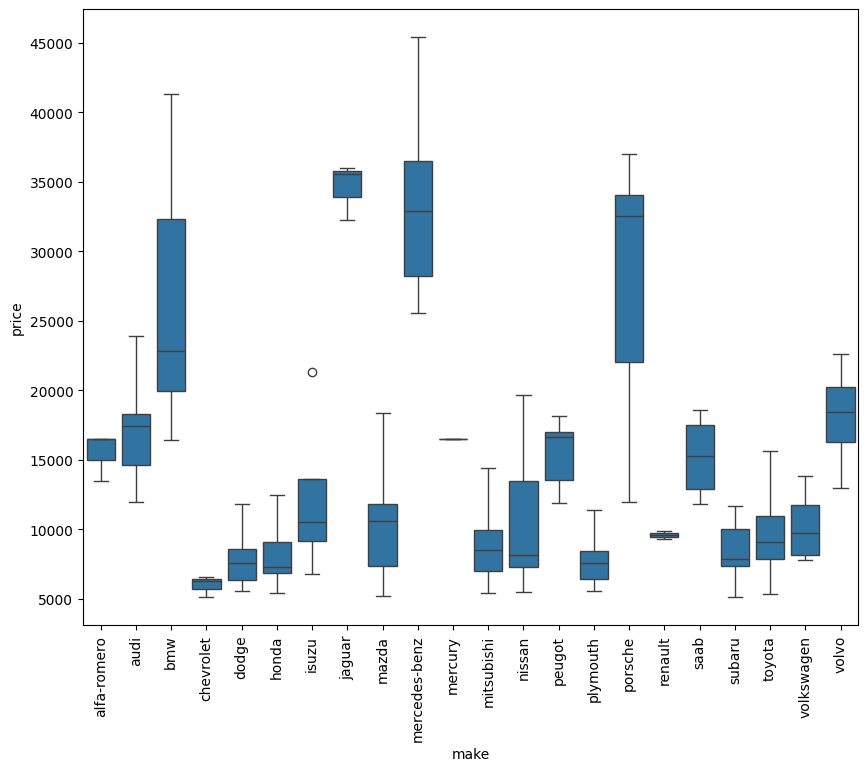

In [65]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_copy, x='make',y='price')
plt.xticks(rotation=90)
plt.show()

### Value Replacement

In [66]:
df_copy = df.copy()

In [67]:
def replacing_outliers(dataframe, value):

    q1 = dataframe[dataframe['make']==value]['price'].quantile(0.25)
    q3 = dataframe[dataframe['make']==value]['price'].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    median = dataframe[dataframe['make']==value]['price'].median()

    dataframe.loc[dataframe[(dataframe['make']==value) & (dataframe['price']>= upper)].index,'price'] = median
    dataframe.loc[dataframe[(dataframe['make']==value) & (dataframe['price']<= lower)].index,'price'] = median

    return dataframe

In [68]:
for i in ['dodge','honda','isuzu','mitsubishi','plymouth','toyota']:
    df_copy = replacing_outliers(df_copy,i)

print(df_copy.shape)

(205, 15)


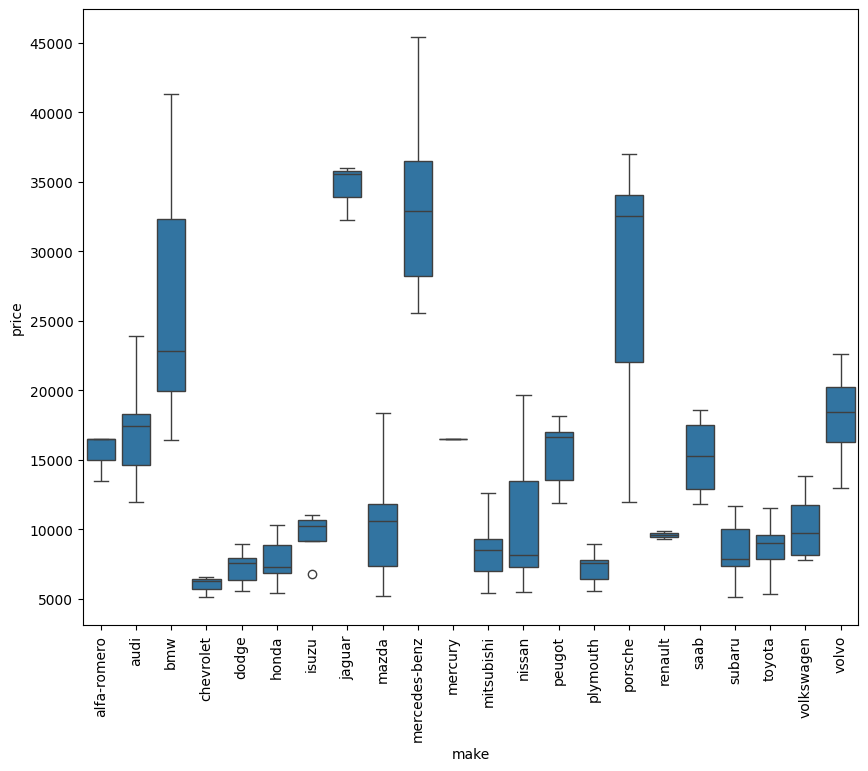

In [69]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_copy, x='make',y='price')
plt.xticks(rotation=90)
plt.show()

# Handling Skewness

There are few options we have for handling skewness:

* Applying square root on that particular column
* Applying log transformation on that particular column

Let's separate out categorical and numerical columns

In [70]:
cat_df = df.select_dtypes(include=['object'])

num_df = df.select_dtypes(include=['float64','int64'])

In [71]:
cat_df.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [72]:
num_df.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,122.0,64.1,48.8,130,111.0,21,27,13495
1,3,122.0,64.1,48.8,130,111.0,21,27,16500
2,1,122.0,65.5,52.4,152,154.0,19,26,16500
3,2,164.0,66.2,54.3,109,102.0,24,30,13950
4,2,164.0,66.4,54.3,136,115.0,18,22,17450


In [73]:
from scipy.stats import skew

symboling
0.20952469094997359


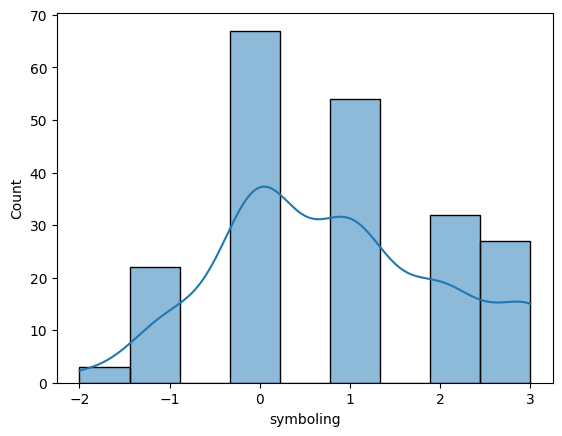

normalized-losses
0.8485348696008058


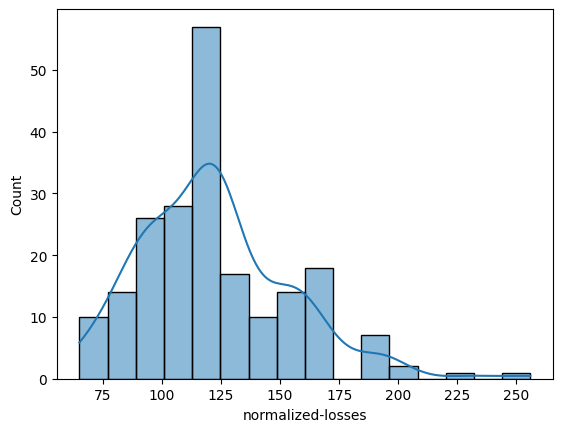

width
0.8973753485201392


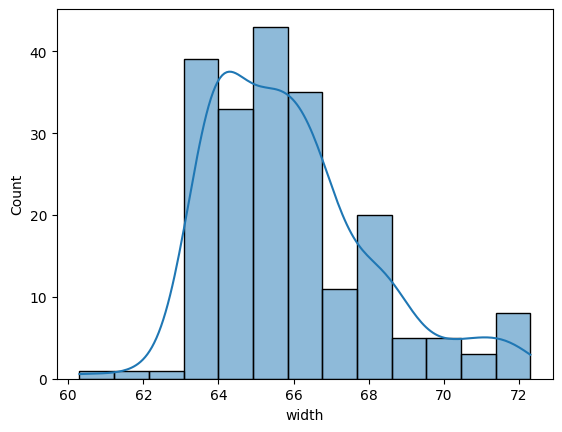

height
0.06265991683394276


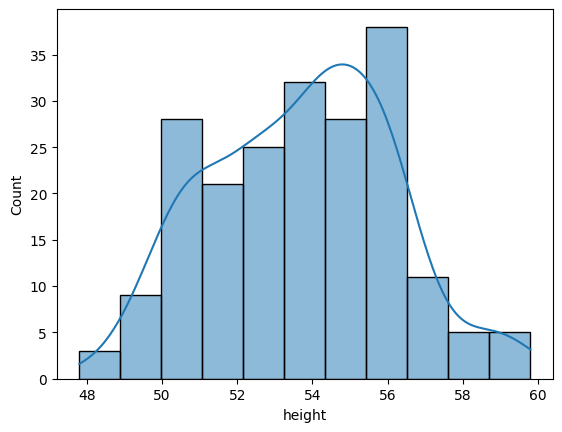

engine-size
1.9333748457840114


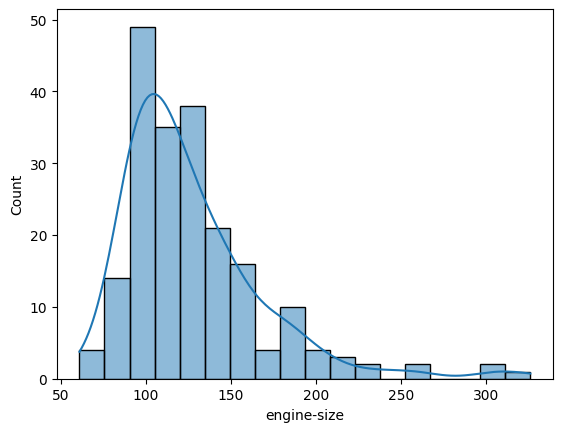

horsepower
1.3875147343096037


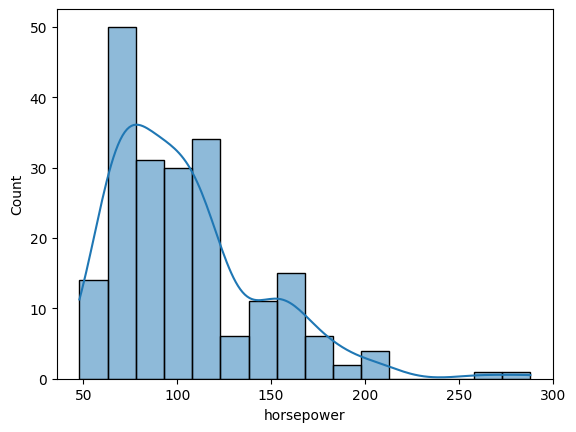

city-mpg
0.6588377533622138


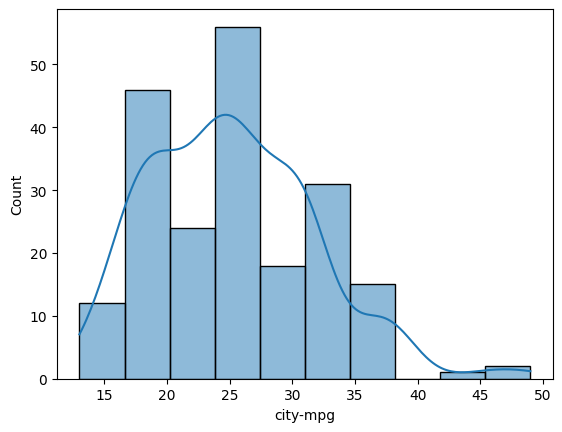

highway-mpg
0.5360379305163596


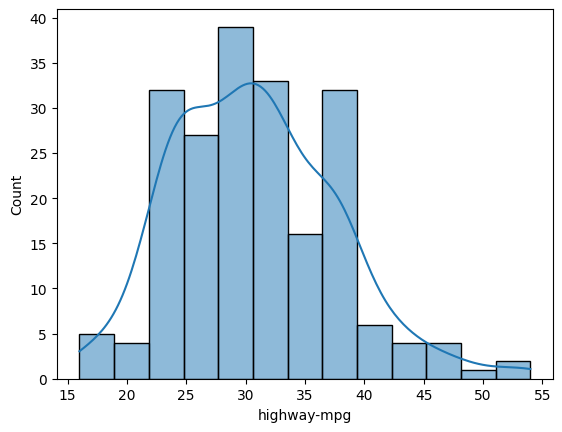

price
1.791937476907277


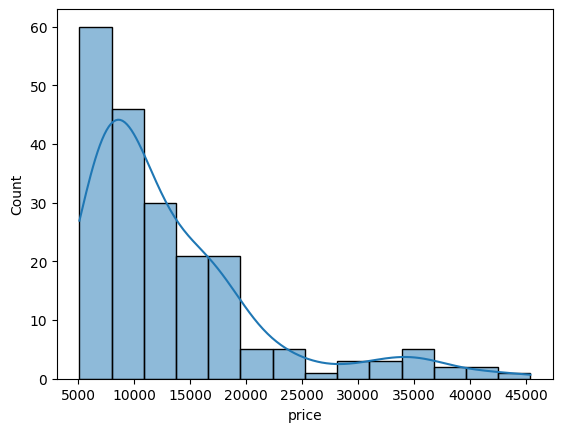

In [74]:
for col in num_df:
    print(col)
    print(skew(num_df[col]))

    plt.figure()
    sns.histplot(num_df[col], kde=True)
    plt.show()

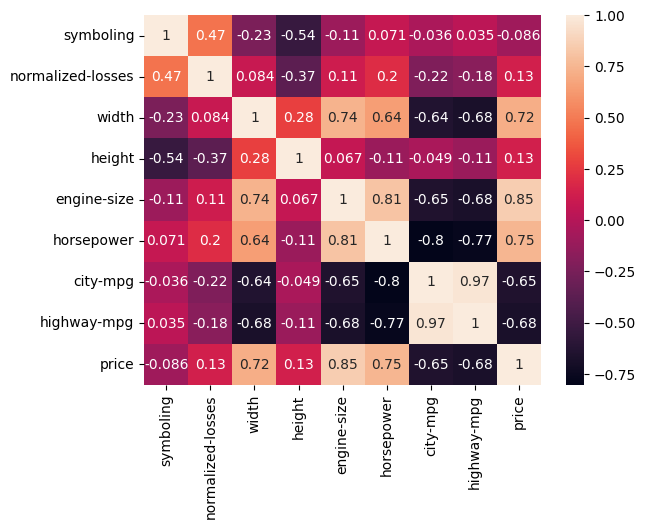

In [75]:
sns.heatmap(num_df.corr(),annot=True)
plt.show()

If skewed column is not correlated with target variable, then dropping is also one of the options.

In [76]:
num_df['normalized-losses'] = np.sqrt(num_df['normalized-losses'])

In [77]:
skew(num_df['normalized-losses'])

0.423806868842261

Symboling column has negative values so square root or logarithm of negative number is not defined

In [78]:
np.sqrt(-1)

nan

In [79]:
np.log(-1)

nan

# Handling Categorical Data

* One hot encoding
* Label encoding

In [80]:
cat_df.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,alfa-romero,gas,convertible,rwd,front,dohc
1,alfa-romero,gas,convertible,rwd,front,dohc
2,alfa-romero,gas,hatchback,rwd,front,ohcv
3,audi,gas,sedan,fwd,front,ohc
4,audi,gas,sedan,4wd,front,ohc


In [81]:
cat_df.tail()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
200,volvo,gas,sedan,rwd,front,ohc
201,volvo,gas,sedan,rwd,front,ohc
202,volvo,gas,sedan,rwd,front,ohcv
203,volvo,diesel,sedan,rwd,front,ohc
204,volvo,gas,sedan,rwd,front,ohc


In [82]:
cat_df['fuel-type'].value_counts()

fuel-type
gas       192
diesel     13
Name: count, dtype: int64

In [83]:
pd.get_dummies(cat_df['fuel-type'], dtype='int64')

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
200,0,1
201,0,1
202,0,1
203,1,0


In [84]:
pd.get_dummies(cat_df['make'],dtype='int64')

,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,...,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
202,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
203,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [85]:
from sklearn.preprocessing import LabelEncoder

In [86]:
le = LabelEncoder()

In [87]:
le.fit_transform(cat_df['fuel-type'])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1])

In [88]:
le.fit_transform(cat_df['make'])

array([ 0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,  2,
        2,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  9,
        9,  9,  9,  9,  9,  9,  9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
       12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14,
       14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 17, 17, 17, 17,
       17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21,
       21])

In [89]:
for col in cat_df:
    cat_df[col] = le.fit_transform(cat_df[col])

In [90]:
cat_df.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


# Data Normalization or Scaling

* Min-Max Scaler
* Standardization

Let's join both categorical and numerical dataframe into single dataframe

In [91]:
final_df = pd.concat([cat_df,num_df],axis=1)

In [92]:
final_df.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0,1,0,2,0,0,3,11.045361,64.1,48.8,130,111.0,21,27,13495
1,0,1,0,2,0,0,3,11.045361,64.1,48.8,130,111.0,21,27,16500
2,0,1,2,2,0,5,1,11.045361,65.5,52.4,152,154.0,19,26,16500
3,1,1,3,1,0,3,2,12.806248,66.2,54.3,109,102.0,24,30,13950
4,1,1,3,0,0,3,2,12.806248,66.4,54.3,136,115.0,18,22,17450


### Min-Max Scaler

### $x_{\text{new}} = \frac{{x_{\text{old}} - x_{\text{min}}}}{{x_{\text{max}} - x_{\text{min}}}}$


In [93]:
a = np.array([10,20,30,40,50])
b = np.array([100,200,300,400,500])

In [94]:
def minmax(array):

    array_new = (array - array.min())/(array.max() - array.min())

    return array_new

In [95]:
minmax(a)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [96]:
minmax(b)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [97]:
minmax(final_df)

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0.000000,1.0,0.00,1.0,0.0,0.000000,1.0,0.375813,0.316667,0.083333,0.260377,0.262500,0.222222,0.289474,0.207959
1,0.000000,1.0,0.00,1.0,0.0,0.000000,1.0,0.375813,0.316667,0.083333,0.260377,0.262500,0.222222,0.289474,0.282558
2,0.000000,1.0,0.50,1.0,0.0,0.833333,0.6,0.375813,0.433333,0.383333,0.343396,0.441667,0.166667,0.263158,0.282558
3,0.047619,1.0,0.75,0.5,0.0,0.500000,0.8,0.597650,0.491667,0.541667,0.181132,0.225000,0.305556,0.368421,0.219254
4,0.047619,1.0,0.75,0.0,0.0,0.500000,0.8,0.597650,0.508333,0.541667,0.283019,0.279167,0.138889,0.157895,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.000000,1.0,0.75,1.0,0.0,0.500000,0.2,0.212219,0.716667,0.641667,0.301887,0.275000,0.277778,0.315789,0.291123
201,1.000000,1.0,0.75,1.0,0.0,0.500000,0.2,0.212219,0.708333,0.641667,0.301887,0.466667,0.166667,0.236842,0.345738
202,1.000000,1.0,0.75,1.0,0.0,0.833333,0.2,0.212219,0.716667,0.641667,0.422642,0.358333,0.138889,0.184211,0.406311
203,1.000000,0.0,0.75,1.0,0.0,0.500000,0.2,0.212219,0.716667,0.641667,0.316981,0.241667,0.361111,0.289474,0.430763


In [98]:
from sklearn.preprocessing import MinMaxScaler

In [99]:
mx = MinMaxScaler()

In [100]:
transformed_array = mx.fit_transform(final_df)

In [101]:
new_df = pd.DataFrame(transformed_array, columns=list(final_df.columns))

In [102]:
new_df.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,0.000000,1.0,0.00,1.0,0.0,0.000000,1.0,0.375813,0.316667,0.083333,0.260377,0.262500,0.222222,0.289474,0.207959
1,0.000000,1.0,0.00,1.0,0.0,0.000000,1.0,0.375813,0.316667,0.083333,0.260377,0.262500,0.222222,0.289474,0.282558
2,0.000000,1.0,0.50,1.0,0.0,0.833333,0.6,0.375813,0.433333,0.383333,0.343396,0.441667,0.166667,0.263158,0.282558
3,0.047619,1.0,0.75,0.5,0.0,0.500000,0.8,0.597650,0.491667,0.541667,0.181132,0.225000,0.305556,0.368421,0.219254
4,0.047619,1.0,0.75,0.0,0.0,0.500000,0.8,0.597650,0.508333,0.541667,0.283019,0.279167,0.138889,0.157895,0.306142


### Standardization

### $z = \frac{{x - \text{mean}}}{{\text{standard deviation}}}$

In [103]:
a = np.array([10,20,30,40,50,60])

In [104]:
def standard_scaler(array):

    new_array = (array - array.mean())/array.std()

    return new_array

In [105]:
standard_scaler(a).mean()

0.0

In [106]:
standard_scaler(a).std()

0.9999999999999999

In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
sc = StandardScaler()

In [109]:
transformed_array = sc.fit_transform(final_df)

In [110]:
new_df = pd.DataFrame(transformed_array, columns=list(final_df.columns))
new_df.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,-1.948256,0.260208,-3.050975,1.213330,-0.121867,-2.865105,1.743470,0.063555,-0.844782,-2.020417,0.074449,0.171065,-0.646553,-0.546059,0.033935
1,-1.948256,0.260208,-3.050975,1.213330,-0.121867,-2.865105,1.743470,0.063555,-0.844782,-2.020417,0.074449,0.171065,-0.646553,-0.546059,0.415118
2,-1.948256,0.260208,-0.717207,1.213330,-0.121867,1.886890,0.133509,0.063555,-0.190566,-0.543527,0.604046,1.261807,-0.953012,-0.691627,0.415118
3,-1.788499,0.260208,0.449677,-0.589081,-0.121867,-0.013908,0.938490,1.322843,0.136542,0.235942,-0.431076,-0.057230,-0.186865,-0.109354,0.091652
4,-1.788499,0.260208,0.449677,-2.391492,-0.121867,-0.013908,0.938490,1.322843,0.230001,0.235942,0.218885,0.272529,-1.106241,-1.273900,0.535625


# Feature Engineering

Creating new feature out of existing features

In [111]:
new_df.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price
0,-1.948256,0.260208,-3.050975,1.213330,-0.121867,-2.865105,1.743470,0.063555,-0.844782,-2.020417,0.074449,0.171065,-0.646553,-0.546059,0.033935
1,-1.948256,0.260208,-3.050975,1.213330,-0.121867,-2.865105,1.743470,0.063555,-0.844782,-2.020417,0.074449,0.171065,-0.646553,-0.546059,0.415118
2,-1.948256,0.260208,-0.717207,1.213330,-0.121867,1.886890,0.133509,0.063555,-0.190566,-0.543527,0.604046,1.261807,-0.953012,-0.691627,0.415118
3,-1.788499,0.260208,0.449677,-0.589081,-0.121867,-0.013908,0.938490,1.322843,0.136542,0.235942,-0.431076,-0.057230,-0.186865,-0.109354,0.091652
4,-1.788499,0.260208,0.449677,-2.391492,-0.121867,-0.013908,0.938490,1.322843,0.230001,0.235942,0.218885,0.272529,-1.106241,-1.273900,0.535625


In [112]:
new_df['area'] = new_df['height'] * new_df['width']
new_df.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,area
0,-1.948256,0.260208,-3.050975,1.213330,-0.121867,-2.865105,1.743470,0.063555,-0.844782,-2.020417,0.074449,0.171065,-0.646553,-0.546059,0.033935,1.706813
1,-1.948256,0.260208,-3.050975,1.213330,-0.121867,-2.865105,1.743470,0.063555,-0.844782,-2.020417,0.074449,0.171065,-0.646553,-0.546059,0.415118,1.706813
2,-1.948256,0.260208,-0.717207,1.213330,-0.121867,1.886890,0.133509,0.063555,-0.190566,-0.543527,0.604046,1.261807,-0.953012,-0.691627,0.415118,0.103578
3,-1.788499,0.260208,0.449677,-0.589081,-0.121867,-0.013908,0.938490,1.322843,0.136542,0.235942,-0.431076,-0.057230,-0.186865,-0.109354,0.091652,0.032216
4,-1.788499,0.260208,0.449677,-2.391492,-0.121867,-0.013908,0.938490,1.322843,0.230001,0.235942,0.218885,0.272529,-1.106241,-1.273900,0.535625,0.054267
